In [171]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread('images/cat.82.jpg')

In [172]:
img

array([[[126, 120, 121],
        [128, 122, 123],
        [129, 123, 124],
        ...,
        [153, 181, 192],
        [153, 181, 192],
        [153, 181, 192]],

       [[125, 119, 120],
        [127, 121, 122],
        [128, 122, 123],
        ...,
        [153, 181, 192],
        [153, 181, 192],
        [153, 181, 192]],

       [[124, 118, 119],
        [125, 119, 120],
        [126, 120, 121],
        ...,
        [153, 181, 192],
        [153, 181, 192],
        [153, 181, 192]],

       ...,

       [[ 86,  85, 111],
        [ 86,  85, 111],
        [ 85,  86, 112],
        ...,
        [145, 144, 153],
        [145, 144, 153],
        [146, 145, 154]],

       [[ 89,  88, 114],
        [ 89,  88, 114],
        [ 88,  89, 115],
        ...,
        [128, 127, 136],
        [129, 128, 137],
        [130, 129, 138]],

       [[ 85,  84, 110],
        [ 86,  85, 111],
        [ 85,  86, 112],
        ...,
        [127, 126, 135],
        [128, 127, 136],
        [129, 128, 137]]

In [173]:
# 图像的显示，也可以创建多个窗口,第一个参数是指定窗口的名字
cv2.imshow('image',img)
# 等待时间，毫秒级，时间表示窗口自动消失的时间，0表示任意键终止
cv2.waitKey()
cv2.destroyAllWindows()

In [174]:
# 用一个函数代替上面三行代码
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [175]:
# Opencv中的图像是BGR格式
img.shape

(332, 500, 3)

#### 灰度图像和彩色图像
- cv2.IMREAD_GRAYSCALE      灰度图像
- cv2.IMREAD_COLOR          彩色图

In [176]:
# 读取灰度图像
img_2 = cv2.imread('images/dog.1124.jpg',cv2.IMREAD_GRAYSCALE)
cv_show('img',img_2)

In [177]:
img_2.shape

(373, 500)

In [178]:
img_2

array([[120, 120, 119, ...,  99,  90,  85],
       [118, 118, 117, ...,  91,  85,  82],
       [115, 115, 115, ...,  82,  79,  78],
       ...,
       [ 36,  17,  23, ...,  68,  49,  99],
       [ 32,  18,  30, ...,  66,  44,  98],
       [ 33,  21,  35, ...,  54,  34,  86]], dtype=uint8)

In [179]:
# 图像保存
cv2.imwrite('images/mycat.jpg',img)

True

In [180]:
# 图片的数据格式为numpy.ndarray
type(img)

numpy.ndarray

#### 数据读取 —— 视频
    - cv2.VideoCapture可以捕捉摄像头信息，用数字来控制不同的设备，例如0，1
    - 如果是视频文件，直接制定好路径即可

In [181]:
vc = cv2.VideoCapture('Video/test.mp4')

In [182]:
if vc.isOpened():
    open,frame = vc.read()
else:
    open = False

In [183]:
while open:
    ret,frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        cv2.imshow('result',gray)
        if cv2.waitKey(50) & 0xFF == 27:
            break
vc.release()
cv2.destroyAllWindows()

#### 截取部分图像数据

In [184]:
# 直接用切片的方式进行图像截取
cat = img[50:200,50:200]
cv2.imshow('cat',cat)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 图像通道提取

In [185]:
b,g,r = cv2.split(img)
b
b.shape

(332, 500)

In [186]:
g
g.shape

(332, 500)

In [187]:
r
r.shape

(332, 500)

In [188]:
# 用merge拼接颜色通道
res = cv2.merge((b,g,r))
res

array([[[126, 120, 121],
        [128, 122, 123],
        [129, 123, 124],
        ...,
        [153, 181, 192],
        [153, 181, 192],
        [153, 181, 192]],

       [[125, 119, 120],
        [127, 121, 122],
        [128, 122, 123],
        ...,
        [153, 181, 192],
        [153, 181, 192],
        [153, 181, 192]],

       [[124, 118, 119],
        [125, 119, 120],
        [126, 120, 121],
        ...,
        [153, 181, 192],
        [153, 181, 192],
        [153, 181, 192]],

       ...,

       [[ 86,  85, 111],
        [ 86,  85, 111],
        [ 85,  86, 112],
        ...,
        [145, 144, 153],
        [145, 144, 153],
        [146, 145, 154]],

       [[ 89,  88, 114],
        [ 89,  88, 114],
        [ 88,  89, 115],
        ...,
        [128, 127, 136],
        [129, 128, 137],
        [130, 129, 138]],

       [[ 85,  84, 110],
        [ 86,  85, 111],
        [ 85,  86, 112],
        ...,
        [127, 126, 135],
        [128, 127, 136],
        [129, 128, 137]]

In [189]:
# 只保留红色通道
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
cv_show('R',cur_img)

In [190]:
# 只保留绿色通道
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,2] = 0
cv_show('G',cur_img)

In [191]:
# 只保留蓝色通道
cur_img = img.copy()
cur_img[:,:,1] = 0
cur_img[:,:,2] = 0
cv_show('B',cur_img)

#### 边界填充

In [192]:
# 指定上下左右填充的大小
top_size,bottom_size,left_size,right_size = (50,50,50,50)

replicate = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_CONSTANT,value=0)

(<matplotlib.axes._subplots.AxesSubplot at 0x246e2cde888>,
 Text(0.5, 1.0, 'CONSTANT'))

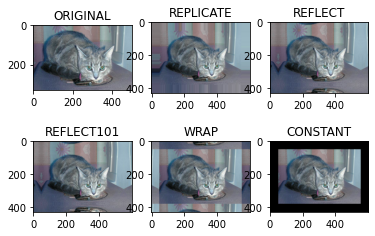

In [193]:
import matplotlib.pyplot as plt
plt.subplot(231), plt.imshow(img,'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate,'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect,'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101,'gray'), plt.title('REFLECT101')
plt.subplot(235), plt.imshow(wrap,'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant,'gray'), plt.title('CONSTANT')

 - BORDER_REFLICATE: 复制法，也就是复制最边缘像素
 - BORDER_REFLECT: 反射法，对感兴趣的图像中的像素在两边进行复制 例如: fedcba|abcdefgh|hgfedcb
 - BORDER_REFLECT: 反射法，也就是以最边缘像素为轴，对称， gfedcb|abcdefgh|gfedcba
 - BORDER_WARP： 外包装法 ：cdefgh|abcdefgh|abcdefg
 - BORDER_CONSTANT: 常量法，常数值填充

#### 数值计算

In [194]:
img_cat = cv2.imread('images/cat.90.jpg')
img_dog = cv2.imread('images/dog.1234.jpg')

In [195]:
img_cat2 = img_cat + 10
img_cat[:5,:,0]

array([[36, 36, 36, ...,  7,  6, 14],
       [36, 36, 37, ...,  0,  3, 10],
       [36, 37, 37, ...,  0,  5, 10],
       [37, 37, 37, ...,  4,  9, 12],
       [37, 37, 38, ..., 23,  9,  8]], dtype=uint8)

In [196]:
img_cat2[:5,:,0]

array([[46, 46, 46, ..., 17, 16, 24],
       [46, 46, 47, ..., 10, 13, 20],
       [46, 47, 47, ..., 10, 15, 20],
       [47, 47, 47, ..., 14, 19, 22],
       [47, 47, 48, ..., 33, 19, 18]], dtype=uint8)

In [197]:
# 超过255的部分会进行取余操作，相当于除以256然后取余
(img_cat + img_cat2)[:5,:,0]

array([[82, 82, 82, ..., 24, 22, 38],
       [82, 82, 84, ..., 10, 16, 30],
       [82, 84, 84, ..., 10, 20, 30],
       [84, 84, 84, ..., 18, 28, 34],
       [84, 84, 86, ..., 56, 28, 26]], dtype=uint8)

In [198]:
# cv2中还自带了一个add函数，它不会进行取余操作，超过255的会等于255
cv2.add(img_cat,img_cat2)[:5,:,0]

array([[82, 82, 82, ..., 24, 22, 38],
       [82, 82, 84, ..., 10, 16, 30],
       [82, 84, 84, ..., 10, 20, 30],
       [84, 84, 84, ..., 18, 28, 34],
       [84, 84, 86, ..., 56, 28, 26]], dtype=uint8)

#### 图像融合

In [199]:
# 图像融合时，两张图片的shape必须相同
img_cat.shape

(336, 447, 3)

In [200]:
img_dog.shape

(500, 342, 3)

In [201]:
# cv2的resize函数不带通道数,输入的顺序是  H,W
img_dog = cv2.resize(img_dog,(447,336))
img_dog.shape

(336, 447, 3)

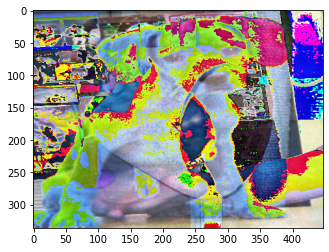

In [202]:
# 这样是不能相加的！！！
img_r = img_cat + img_dog
plt.imshow(img_r)

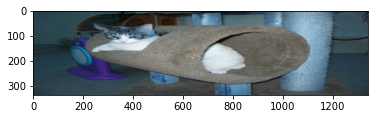

In [203]:
# 指定缩放倍数倍数
res = cv2.resize(img_cat,(0,0),fx=3,fy=1)
plt.imshow(res)

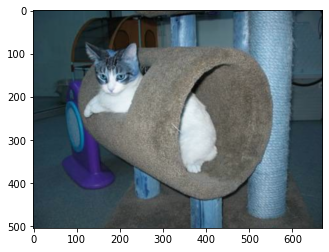

In [204]:
res = cv2.resize(img_cat,(0,0),fx=1.5,fy=1.5)
plt.imshow(res)

In [205]:
# 图像线性融合公式
res = cv2.addWeighted(img_cat,0.4,img_dog,0.6,0)
plt.imshow(res)